In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import cmath

def pdf(a,x):                           # Probability Distribution 
    y=(0.5/a) * np.exp(-abs(x)/a)       
    return y

def omega_list(no_of_osc, a):           # To generate a lorentzian weighted distribution of w.
    N=0 
    x_list=[]
    while(N!=no_of_osc):
        x=random.uniform(-8,8)          # Generate a uniform random number between some apt finite range of x.
        y=random.uniform(0,1)           # Generate a uniform random number between 0 and y_max
        if(pdf(a,x)>y):                 # if the random y value < pdf(x), then accept that point.
            x_list.append(x)
            N=N+1
    x_list=np.array(x_list)
    return x_list

def rpsi(theta_list):              # to find r(t) and psi(t) for a given time t 
    z=np.mean(np.exp([complex(0,theta) for theta in theta_list]))
    r=abs(z)
    psi=cmath.phase(z)    
    return r,psi

def evolution(theta_list,w_list,k,r,psi,dt):   # Integration function for theta_i's
    new_theta=np.add(theta_list,dt*np.add(w_list,k*r*np.sin(np.subtract(psi,theta_list))))
    return new_theta

def random_theta_i(N):
    anglelist=np.zeros(N, dtype=float)
    for i in range(N):
        theta=random.random()*2*np.pi
        anglelist[i]+=theta
    return anglelist

def plot_circle(theta_list,t,r,psi):
    fig= plt.figure()
    circ=np.arange(0,6.8,0.1)
    plt.plot(0,0,".", color="#000000")
    plt.plot([0,r*np.sin(psi)],[0,r*np.cos(psi)],color="#000000")
    plt.plot(r*np.sin(psi),r*np.cos(psi), 'o', color="#000000")
    x_list,y_list=np.sin(circ),np.cos(circ)
    plt.plot(x_list,y_list,'-', color="#000000")
    sin_list,cos_list=np.sin(np.array(theta_list)),np.cos(np.array(theta_list))
    for x,y in zip(sin_list,cos_list):
            plt.plot(x,y,'o')
    plt.axis("equal")
    plt.grid(True)
    ax = fig.add_subplot(111)
    ax.text(1,-0.75,"t = " + str (t) ,color='black', fontsize=12)
    plt.savefig('fancy plot '  + "t=" + str(t) +'.png', dpi=(200)) 
    plt.show()

Runtime=  197.44966459999978  secs


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


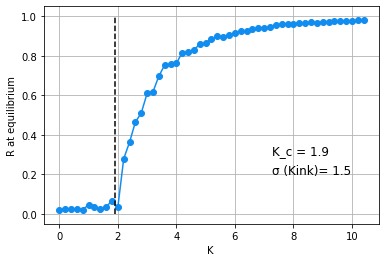

In [30]:
for sigma in np.arange(1.5,2,0.5):
    r_list=[]
    k_list=[]
    start = timer()
    for k in np.concatenate((np.concatenate((np.arange(0,0,0.5),np.arange(0,0,0.2))),np.arange(0,10.5,0.2))):
        list_to_avg=[]
        for j in range(1):            # average over values of r for same value of k (set at 1 for now) 
            dt=10**(-2)               # delta t                 
            time_steps=4*(10**3)      # Number of Time Steps
            N=2*10**3                 # Number of Oscillators
            rlist=np.zeros(int(time_steps), dtype=float)
            w_list=omega_list(N, sigma)               # Initial Distribution of angular frequencies.
            theta_list=random_theta_i(N)   # Initial Random Distribution of Phases.
            

            
            for t in range(int(time_steps)):
                r,psi=rpsi(theta_list)
                theta_list=evolution(theta_list,w_list,k,r,psi,dt)      # New theta Phase list.
                rlist[t]+=r  
            r_mean=np.mean(rlist[int(np.floor(len(rlist)*3/4)):int(len(rlist))])   # Mean over the last 25% elements
            list_to_avg.append(r_mean)
        
        r_list.append(np.mean(np.array(list_to_avg)))
        k_list.append(k)
            
    end = timer()
    
    # Ugly code to find K_c
    print("Runtime= ", end-start, " secs")
    kc_list_a=np.zeros(len(k_list)-1,dtype=float)
    for i in range(len(k_list)-1):
        kc_list_a[i]=kc_list_a[i]+(r_list[i+1]-r_list[i])
    kc_index_a=np.where(kc_list_a==np.amax(kc_list_a))[0][0]
    kc_a=k_list[kc_index_a]
    
    kc_list_b=np.zeros(len(k_list),dtype=float)
    for j in range(len(k_list)):
        kc_list_b[j]=kc_list_b[j]+abs(r_list[j]-0.1)
    kc_index_b=np.where(kc_list_b==np.min(kc_list_b))[0][0]
    kc_b=k_list[kc_index_b]
    
    kc=np.round((kc_a+kc_b)/2,3)
    # Ugly code to find K_c OVER
    
    
    # Ugly code to plot and save
    fig= plt.figure()
    plt.plot(k_list,r_list,'o-', color="#118df0")
    plt.plot([kc,kc],[0,1],'--', color="#000000")
    plt.grid(True)
    plt.ylabel("R at equilibrium")
    plt.xlabel("K ")
    ax = fig.add_subplot(111)
    ax.text(0.7*k,0.3,"K_c = " + str (round(kc,4)) ,color='black', fontsize=12)
    ax.text(0.7*k,0.2,"σ (Kink)= " + str(sigma) ,color='black', fontsize=12)
    plt.savefig('plot ' + "Kink " + "σ=" + str(sigma) + " dt=" + str(dt) + " time="+ str(time_steps*dt)+'.png', dpi=(200))  
    plt.show()    
    # Ugly code to plot and save OVER

C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


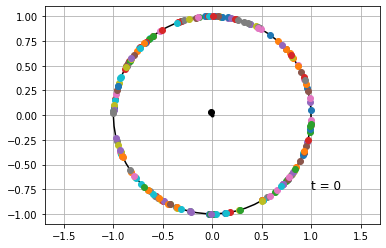

0 4.0


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


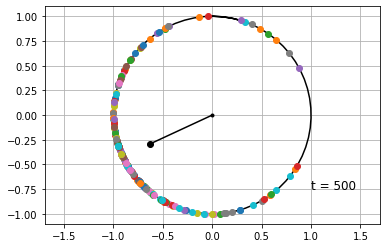

500 4.0


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


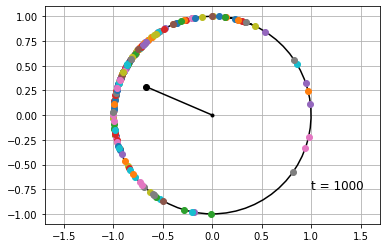

1000 4.0


In [21]:
#----------------------------------------------------------------------
#---FOR GENERATING REALTIME PLOTS OF OSCILLATORS EVOLUTION WITH TIME---
#----------------------------------------------------------------------

for sigma in np.arange(1.5,2,1):
    r_list=[]
    k_list=[]
    start = timer()
    for k in np.concatenate((np.concatenate((np.arange(0,0,0.5),np.arange(0,0,0.2))),np.arange(0,4.5,0.5))):
        list_to_avg=[]
        for j in range(1):            # average over values of r for same value of k (set at 1 for now) 
            dt=10**(-2)               # delta t                 
            time_steps=1.5*(10**3)      # Number of Time Steps
            N=2*10**2                 # Number of Oscillators
            rlist=np.zeros(int(time_steps), dtype=float)
            w_list=omega_list(N, sigma)               # Initial Distribution of angular frequencies.
            theta_list=random_theta_i(N)   # Initial Random Distribution of Phases.
            
            for t in range(int(time_steps)):
                r,psi=rpsi(theta_list)
                theta_list=evolution(theta_list,w_list,k,r,psi,dt)      # New theta Phase list.
                rlist[t]+=r  
                if (t%(5*(10**2))==0 and int(k)==4):
                    plot_circle(theta_list,t,r,psi)
                    print(t,k)
                    
            plt.plot(np.arange(0,time_steps*dt,dt),rlist)                    
            r_mean=np.mean(rlist[int(np.floor(len(rlist)*3/4)):int(len(rlist))])   # Mean over the last 25% elements
            list_to_avg.append(r_mean)
        
        r_list.append(np.mean(np.array(list_to_avg)))
        k_list.append(k)
            
    end = timer()

C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


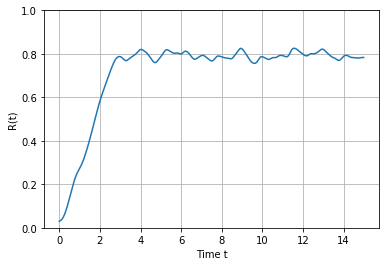

In [23]:
#----------------------------------------------------------------------
#---FOR GENERATING REALTIME PLOTS OF OSCILLATORS EVOLUTION WITH TIME---
#----------------------------------------------------------------------

for sigma in np.arange(1.5,2,1):
    r_list=[]
    k_list=[]
    fig= plt.figure()
    start = timer()
    for k in np.concatenate((np.concatenate((np.arange(0,0,0.5),np.arange(0,0,0.2))),np.arange(4,4.5,0.5))):
        list_to_avg=[]
        for j in range(1):            # average over values of r for same value of k (set at 1 for now) 
            dt=10**(-2)               # delta t                 
            time_steps=1.5*(10**3)      # Number of Time Steps
            N=2*10**2                 # Number of Oscillators
            rlist=np.zeros(int(time_steps), dtype=float)
            w_list=omega_list(N, sigma)               # Initial Distribution of angular frequencies.
            theta_list=random_theta_i(N)   # Initial Random Distribution of Phases.
            
            for t in range(int(time_steps)):
                r,psi=rpsi(theta_list)
                theta_list=evolution(theta_list,w_list,k,r,psi,dt)      # New theta Phase list.
                rlist[t]+=r 
                   
            plt.plot(np.arange(0,time_steps*dt,dt),rlist,"-")                    
            r_mean=np.mean(rlist[int(np.floor(len(rlist)*3/4)):int(len(rlist))])   # Mean over the last 25% elements
            list_to_avg.append(r_mean)
        
        r_list.append(np.mean(np.array(list_to_avg)))
        k_list.append(k)
            
    end = timer()
    plt.ylim(0,1)
    plt.grid(True)
    plt.xlabel("Time t")
    plt.ylabel("R(t)")
    ax = fig.add_subplot(111)
    plt.savefig('plot abc'+'.png', dpi=(200))  
    plt.show()
    